# Proyek Analisis Data: Bike Sharing Dataset

Nama: Nabil Najmudin

Email: nabiil.najm266@gmail.com

Id Dicoding: nabiil_najm266

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
- Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan waktu bulan??
- Pertanyaan 3: Jam Berapa Saja Penggunaan Sepeda Ramai dan Sepi?
- Pertanyaan 4: Bagaimana Retensi dan Loyalitas Pengguna?

## Import Library yang Dibutuhkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset
day_df = pd.read_csv('data/day.csv')

# Menampilkan data awal
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Load dataset
hour_df = pd.read_csv('data/hour.csv')

# Menampilkan data awal
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assesing Data

In [4]:
print(hour_df.info())
print(day_df.info())

# Mengecek keberadaan missing value di dataset
print(hour_df.isna().sum())
print(day_df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeI

In [5]:
# Memeriksa duplikasi
print("Jumlah duplikasi hour_df: ", hour_df.duplicated().sum())
print("Jumlah duplikasi day_df: ", day_df.duplicated().sum())

Jumlah duplikasi hour_df:  0
Jumlah duplikasi day_df:  0


In [6]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat dalam day_df
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

In [7]:
# Memeriksa parameter statistik dari kolom numerik yang terdapat di dalam hour_df
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

### Cleaning Data

Cleaning data dilakukan berdasarkan hasil assessment data, yang bertujuan untuk memastikan data siap untuk analisis lebih lanjut. Berikut adalah alasan mengapa langkah-langkah cleaning data di bawah ini akan dilakukan:

1. **Menghapus Kolom `instant` dan `workingday`:**
   - **`instant`**: Kolom ini adalah indeks atau urutan baris yang tidak memberikan informasi tambahan yang berguna untuk analisis.
   - **`workingday`**: Kolom ini menunjukkan apakah hari tersebut adalah hari kerja atau bukan, namun informasi ini sudah diwakili oleh kolom `weekday`.

2. **Mengubah Tipe Data:**
   - Kolom `season`, `mnth`, `holiday`, `weekday`, dan `weathersit` diubah menjadi tipe data kategori. Hal ini dilakukan untuk menghemat memori dan mempercepat proses analisis karena kolom-kolom ini berisi data kategori yang berulang.

3. **Mengubah Tipe Data `dteday` menjadi `datetime`:**
   - Mengubah kolom `dteday` menjadi tipe data `datetime` untuk memudahkan manipulasi dan analisis data berdasarkan tanggal.

4. **Mengganti Nama Kolom:**
   - Beberapa kolom diganti namanya agar lebih mudah dibaca dan dipahami, seperti `yr` menjadi `year`, `mnth` menjadi `month`, `weekday` menjadi `one_of_week`, `weathersit` menjadi `weather_situation`, `windspeed` menjadi `wind_speed`, `cnt` menjadi `count_cr`, dan `hum` menjadi `humidity`.

5. **Mengkonversi Isi Kolom:**
   - Isi kolom `season`, `month`, `weather_situation`, dan `one_of_week` dikonversi menjadi bentuk yang lebih mudah dipahami (misalnya, 1 menjadi 'Spring', 2 menjadi 'Summer', dan seterusnya).

6. **Menghitung Humidity:**
   - Nilai kelembapan (`humidity`) dikalikan dengan 100 untuk mengembalikan ke persentase asli.

7. **Normalisasi Suhu:**
   - Mengembalikan suhu (`temp` dan `atemp`) ke dalam satuan Celsius dengan mengalikan dengan faktor tertentu.

8. **Membuat Kolom `category_days`:**
   - Kolom baru `category_days` dibuat untuk mengkategorikan hari menjadi `weekend` atau `weekdays`, berdasarkan nilai di kolom `one_of_week`.

9. **Membuat Kolom `humidity_category`:**
   - Kolom baru `humidity_category` dibuat untuk mengklasifikasikan kelembapan menjadi `Terlalu kering`, `Ideal`, atau `Terlalu Lembab` berdasarkan nilai di kolom `humidity`.

In [8]:
# Menghapus kolom instant dan workingday
# Kolom 'instant' adalah indeks atau urutan baris yang tidak memberikan informasi tambahan yang berguna untuk analisis.
# Kolom 'workingday' menunjukkan apakah hari tersebut adalah hari kerja atau bukan, namun informasi ini sudah diwakili oleh kolom 'weekday'.
hour_df.drop(['workingday'], axis=1, inplace=True)
day_df.drop(['workingday'], axis=1, inplace=True)

In [9]:
# Memastikan kolom sudah dihapus
print("Kolom setelah penghapusan di hour_df: ", hour_df.columns)
print("Kolom setelah penghapusan di day_df: ", day_df.columns)

Kolom setelah penghapusan di hour_df:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')
Kolom setelah penghapusan di day_df:  Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')


In [10]:
# Mengubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']
for column in columns:
    day_df[column] = day_df[column].astype("category")
    hour_df[column] = hour_df[column].astype("category")

In [11]:
# Memastikan tipe data sudah diubah
print(day_df.dtypes)
print(hour_df.dtypes)

instant          int64
dteday          object
season        category
yr               int64
mnth          category
holiday       category
weekday       category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object
instant          int64
dteday          object
season        category
yr               int64
mnth          category
hr               int64
holiday       category
weekday       category
weathersit    category
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual           int64
registered       int64
cnt              int64
dtype: object


In [12]:
# Mengubah tipe data dteday menjadi datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [13]:
# Memastikan tipe data dteday sudah diubah
print(day_df.dtypes)
print(hour_df.dtypes)

instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
holiday             category
weekday             category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object
instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                category
hr                     int64
holiday             category
weekday             category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object


In [14]:
# Mengganti nama kolom agar lebih mudah dibaca
day_df.rename(columns={'yr':'year', 'mnth':'month', 'weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed', 'cnt':'count_cr', 'hum':'humidity'}, inplace=True)
hour_df.rename(columns={'yr':'year', 'hr':'hours', 'mnth':'month', 'weekday':'one_of_week', 'weathersit':'weather_situation', 'windspeed':'wind_speed', 'cnt':'count_cr', 'hum':'humidity'}, inplace=True)

In [15]:
# Memastikan kolom sudah diganti nama
print(day_df.columns)
print(hour_df.columns)

Index(['instant', 'dteday', 'season', 'year', 'month', 'holiday',
       'one_of_week', 'weather_situation', 'temp', 'atemp', 'humidity',
       'wind_speed', 'casual', 'registered', 'count_cr'],
      dtype='object')
Index(['instant', 'dteday', 'season', 'year', 'month', 'hours', 'holiday',
       'one_of_week', 'weather_situation', 'temp', 'atemp', 'humidity',
       'wind_speed', 'casual', 'registered', 'count_cr'],
      dtype='object')


In [16]:
# Mengkonversi isi kolom agar mudah dipahami
day_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
hour_df['season'].replace({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}, inplace=True)
day_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
hour_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
day_df['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}, inplace=True)
hour_df['weather_situation'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_rainsnow', 4: 'Heavy_rainsnow'}, inplace=True)
day_df['one_of_week'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
hour_df['one_of_week'].replace({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}, inplace=True)
day_df['year'].replace({0: '2011', 1: '2012'}, inplace=True)
hour_df['year'].replace({0: '2011', 1: '2012'}, inplace=True)

In [17]:
# Memastikan isi kolom sudah dikonversi
print(day_df.head())
print(hour_df.head())

   instant     dteday  season  year month holiday one_of_week  \
0        1 2011-01-01  Spring  2011   Jan       0    Saturday   
1        2 2011-01-02  Spring  2011   Jan       0      Sunday   
2        3 2011-01-03  Spring  2011   Jan       0      Monday   
3        4 2011-01-04  Spring  2011   Jan       0     Tuesday   
4        5 2011-01-05  Spring  2011   Jan       0   Wednesday   

  weather_situation      temp     atemp  humidity  wind_speed  casual  \
0             Misty  0.344167  0.363625  0.805833    0.160446     331   
1             Misty  0.363478  0.353739  0.696087    0.248539     131   
2             Clear  0.196364  0.189405  0.437273    0.248309     120   
3             Clear  0.200000  0.212122  0.590435    0.160296     108   
4             Clear  0.226957  0.229270  0.436957    0.186900      82   

   registered  count_cr  
0         654       985  
1         670       801  
2        1229      1349  
3        1454      1562  
4        1518      1600  
   instant    

In [18]:
# Menghitung Humidity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

In [19]:
# Memastikan humidity sudah dikonversi
print(day_df['humidity'].head())
print(hour_df['humidity'].head())

0    80.5833
1    69.6087
2    43.7273
3    59.0435
4    43.6957
Name: humidity, dtype: float64
0    81.0
1    80.0
2    80.0
3    75.0
4    75.0
Name: humidity, dtype: float64


In [20]:
# Normalisasi suhu (mengembalikan ke Celsius)
hour_df['temp_celsius'] = hour_df['temp'] * 41
hour_df['atemp_celsius'] = hour_df['atemp'] * 50

day_df['temp_celsius'] = hour_df['temp'] * 41
day_df['atemp_celsius'] = hour_df['atemp'] * 50

In [21]:
# Memastikan suhu sudah dikonversi
print(day_df['temp_celsius'].head())
print(hour_df['temp_celsius'].head())

print(day_df['atemp_celsius'].head())
print(hour_df['atemp_celsius'].head())

0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temp_celsius, dtype: float64
0    9.84
1    9.02
2    9.02
3    9.84
4    9.84
Name: temp_celsius, dtype: float64
0    14.395
1    13.635
2    13.635
3    14.395
4    14.395
Name: atemp_celsius, dtype: float64
0    14.395
1    13.635
2    13.635
3    14.395
4    14.395
Name: atemp_celsius, dtype: float64


In [22]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
def get_category_days(one_of_week):
    if one_of_week in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["one_of_week"].apply(get_category_days)
day_df["category_days"] = day_df["one_of_week"].apply(get_category_days)

In [23]:
# Memastikan kolom category_days sudah ditambahkan
print(day_df[['one_of_week', 'category_days']].head())
print(hour_df[['one_of_week', 'category_days']].head())

  one_of_week category_days
0    Saturday       weekend
1      Sunday       weekend
2      Monday      weekdays
3     Tuesday      weekdays
4   Wednesday      weekdays
  one_of_week category_days
0    Saturday       weekend
1    Saturday       weekend
2    Saturday       weekend
3    Saturday       weekend
4    Saturday       weekend


In [24]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

In [25]:
# Memastikan kolom humidity_category sudah ditambahkan
print(day_df[['humidity', 'humidity_category']].head())
print(hour_df[['humidity', 'humidity_category']].head())

   humidity humidity_category
0   80.5833    Terlalu Lembab
1   69.6087    Terlalu Lembab
2   43.7273    Terlalu kering
3   59.0435             Ideal
4   43.6957    Terlalu kering
   humidity humidity_category
0      81.0    Terlalu Lembab
1      80.0    Terlalu Lembab
2      80.0    Terlalu Lembab
3      75.0    Terlalu Lembab
4      75.0    Terlalu Lembab


## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [26]:
day_df.describe()

,instant,dteday,temp,atemp,humidity,wind_speed,casual,registered,count_cr,temp_celsius,atemp_celsius
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,0.495385,0.474354,62.789406,0.190486,848.176471,3656.172367,4504.348837,8.166347,10.322353
min,1.000000,2011-01-01 00:00:00,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,0.820000,0.000000
25%,183.500000,2011-07-02 12:00:00,0.337083,0.337842,52.000000,0.134950,315.500000,2497.000000,3152.000000,6.560000,7.575000
50%,366.000000,2012-01-01 00:00:00,0.498333,0.486733,62.666700,0.180975,713.000000,3662.000000,4548.000000,8.200000,10.605000
75%,548.500000,2012-07-01 12:00:00,0.655417,0.608602,73.020850,0.233214,1096.000000,4776.500000,5956.000000,9.840000,12.120000
max,731.000000,2012-12-31 00:00:00,0.861667,0.840896,97.250000,0.507463,3410.000000,6946.000000,8714.000000,18.860000,22.725000
std,211.165812,NaN,0.183051,0.162961,14.242910,0.077498,686.622488,1560.256377,1937.211452,3.180305,3.845562


#### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

Pertanyaan ini dijawab dengan mengelompokkan data berdasarkan kondisi cuaca (weather_situation) dan menghitung statistik deskriptif untuk jumlah peminjaman sepeda (count_cr).

In [27]:
# Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?
weather_stats = day_df.groupby('weather_situation')['count_cr'].describe()
weather_stats

,count,mean,std,min,25%,50%,75%,max
weather_situation,,,,,,,,
Clear,463.0,4876.786177,1879.483989,431.0,3636.5,4844.0,6458.5,8714.0
Misty,247.0,4035.862348,1809.109918,605.0,2674.5,4040.0,5257.5,8362.0
Light_rainsnow,21.0,1803.285714,1240.284449,22.0,705.0,1817.0,2424.0,4639.0


Hasil analisis menunjukkan bahwa:

1. **Cuaca Cerah (Clear)**:
   - Median jumlah peminjaman sepeda pada kondisi cuaca cerah adalah yang tertinggi dibandingkan dengan kondisi cuaca lainnya. Ini menunjukkan bahwa lebih banyak orang cenderung menyewa sepeda ketika cuaca cerah.
   - Rentang interquartile (IQR) pada kondisi cuaca cerah cukup besar, yang berarti variasi jumlah peminjaman sepeda cukup lebar. Hal ini menunjukkan bahwa meskipun ada banyak peminjaman, jumlahnya dapat bervariasi secara signifikan dari hari ke hari.
   - Terdapat beberapa outliers atau pencilan yang menunjukkan jumlah peminjaman yang sangat tinggi atau sangat rendah, ini bisa disebabkan oleh faktor-faktor khusus pada hari-hari tertentu seperti event khusus atau hari libur.

2. **Cuaca Berkabut (Misty)**:
   - Median jumlah peminjaman sepeda pada kondisi cuaca berkabut sedikit lebih rendah dibandingkan dengan cuaca cerah. Ini menunjukkan bahwa meskipun cuaca berkabut, orang masih cenderung menyewa sepeda dalam jumlah yang cukup banyak.
   - Variasi jumlah peminjaman pada cuaca berkabut juga cukup besar, meskipun tidak sebesar pada kondisi cuaca cerah. Ini menunjukkan bahwa peminjaman sepeda tetap bervariasi dalam kondisi ini, tetapi lebih konsisten dibandingkan cuaca cerah.
   - Terdapat beberapa pencilan yang menunjukkan jumlah peminjaman yang sangat tinggi atau rendah pada kondisi berkabut, yang bisa disebabkan oleh kondisi cuaca yang berubah-ubah atau faktor-faktor lainnya.

3. **Hujan Ringan/Salju Ringan (Light_rainsnow)**:
   - Median jumlah peminjaman sepeda pada kondisi hujan ringan atau salju ringan adalah yang terendah. Ini menunjukkan bahwa kondisi cuaca buruk seperti hujan ringan atau salju ringan sangat mempengaruhi keputusan orang untuk menyewa sepeda.
   - Rentang interquartile (IQR) pada kondisi ini lebih sempit, menunjukkan bahwa variasi jumlah peminjaman lebih sedikit. Ini berarti jumlah peminjaman cenderung rendah dan lebih konsisten pada kondisi cuaca buruk.
   - Terdapat beberapa pencilan, tetapi jumlahnya tidak sebanyak pada kondisi cuaca lainnya. Ini menunjukkan bahwa meskipun ada beberapa hari dengan jumlah peminjaman yang tidak biasa, hal ini jarang terjadi dalam kondisi cuaca buruk.

#### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan waktu bulan?

Untuk menjawab pertanyaan ini, kita menghitung rata-rata jumlah peminjaman sepeda per bulan.

In [28]:
# Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan waktu bulan?
day_df['month'] = day_df['dteday'].dt.month_name()
month_avg = day_df.groupby('month')['count_cr'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Mengubah Series menjadi DataFrame agar tampilan lebih rapi
month_avg_df = month_avg.reset_index().rename(columns={0: 'Average Rentals'})
month_avg_df

,month,count_cr
0,January,2176.338710
1,February,2655.298246
2,March,3692.258065
3,April,4484.900000
4,May,5349.774194
5,June,5772.366667
6,July,5563.677419
7,August,5664.419355
8,September,5766.516667
9,October,5199.225806


Hasil analisis menunjukkan bahwa:

1. **Bulan dengan Penggunaan Tertinggi**:
   - **Juni** dan **September** adalah bulan dengan jumlah peminjaman sepeda tertinggi, menunjukkan puncak penggunaan selama bulan-bulan ini.
   - **Agustus** dan **Juli** juga memiliki jumlah peminjaman yang tinggi, menunjukkan peningkatan signifikan dalam penggunaan sepeda selama bulan-bulan musim panas.
   - **Mei** menunjukkan peningkatan penggunaan sepeda yang dimulai pada musim semi.

2. **Bulan dengan Penggunaan Terendah**:
   - **Januari** dan **Februari** memiliki jumlah peminjaman sepeda terendah, kemungkinan disebabkan oleh cuaca musim dingin yang kurang mendukung.
   - **Desember** juga menunjukkan penurunan signifikan dalam jumlah peminjaman, yang dapat dikaitkan dengan cuaca dingin dan liburan akhir tahun.

3. **Tren Penggunaan Sepeda**:
   - Penggunaan sepeda mulai meningkat pada bulan **Maret** dan **April**, saat cuaca mulai membaik, dan mencapai puncaknya selama bulan-bulan musim panas (Mei hingga September).
   - Setelah September, penggunaan sepeda mulai menurun, dengan penurunan bertahap pada bulan **Oktober**, **November**, dan **Desember**.

#### Pertanyaan 4: Bagaimana Retensi dan Loyalitas Pengguna?

Untuk melakukan EDA pada retensi dan loyalitas pengguna, kita akan fokus pada analisis RFM (Recency, Frequency, Monetary). Berikut adalah langkah-langkah dan analisis yang kita lakukan:

In [29]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Hitung Recency, Frequency, dan Monetary per pengguna
current_date = hour_df['dteday'].max()

# Group by registered users dan hitung RFM
rfm_df = hour_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'instant': 'count',  # Frequency
    'count_cr': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']
rfm_df.to_csv('rfm_analysis.csv', index=False)
rfm_df

,registered,Recency,Frequency,Monetary
0,0,38,24,35
1,1,0,201,294
2,2,1,245,648
3,3,0,294,1154
4,4,3,307,1602
...,...,...,...,...
771,860,97,1,967
772,871,69,1,938
773,876,68,2,1916
774,885,102,1,976


##### Analisis EDA untuk RFM

**Insight**:
- Mayoritas pengguna melakukan transaksi terakhir mereka dalam waktu yang relatif dekat (0-100 hari).

- Sebagian besar pengguna memiliki jumlah transaksi yang rendah, dengan mayoritas pengguna memiliki kurang dari 50 transaksi.


- Nilai monetary (total peminjaman) pengguna cenderung menurun seiring dengan meningkatnya jumlah total peminjaman.




### Explore Data hour_df

In [30]:
hour_df.describe()

,instant,dteday,hours,temp,atemp,humidity,wind_speed,casual,registered,count_cr,temp_celsius,atemp_celsius
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,11.546752,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,20.376474,23.788755
min,1.0000,2011-01-01 00:00:00,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.820000,0.000000
25%,4345.5000,2011-07-04 00:00:00,6.000000,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,13.940000,16.665000
50%,8690.0000,2012-01-02 00:00:00,12.000000,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,20.500000,24.240000
75%,13034.5000,2012-07-02 00:00:00,18.000000,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,27.060000,31.060000
max,17379.0000,2012-12-31 00:00:00,23.000000,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,41.000000,50.000000
std,5017.0295,NaN,6.914405,0.192556,0.171850,19.292983,0.122340,49.305030,151.357286,181.387599,7.894801,8.592511


#### Pertanyaan 3: Jam Berapa Saja Penggunaan Sepeda Ramai dan Sepi?

In [31]:
# Menghitung jumlah peminjaman rata-rata per jam
hour_avg = hour_df.groupby('hours')['count_cr'].mean().reset_index().rename(columns={'hours': 'hour', 'count_cr': 'avg_rentals'})

# Menentukan threshold clustering
threshold = hour_avg['avg_rentals'].mean()

# Menambahkan kolom cluster
hour_avg['cluster'] = ['High' if x >= threshold else 'Low' for x in hour_avg['avg_rentals']]
hour_avg

,hour,avg_rentals,cluster
0,0,53.898072,Low
1,1,33.375691,Low
2,2,22.869930,Low
3,3,11.727403,Low
4,4,6.352941,Low
5,5,19.889819,Low
6,6,76.044138,Low
7,7,212.064649,High
8,8,359.011004,High
9,9,219.309491,High


Analisis ini menunjukkan jam-jam sibuk (High) dan tidak sibuk (Low) berdasarkan rata-rata jumlah peminjaman sepeda. Hasil analisis menunjukkan bahwa:

1. **Jam dengan Peminjaman Tinggi (High)**:
   - Jam sibuk dengan peminjaman sepeda tertinggi adalah antara jam 7 pagi hingga 9 pagi (07:00 - 09:00) dan jam 4 sore hingga 8 malam (16:00 - 20:00).
   - Puncak tertinggi adalah pada jam 5 sore (17:00) dengan rata-rata peminjaman mencapai 461.45 sepeda.

2. **Jam dengan Peminjaman Rendah (Low)**:
   - Jam-jam dengan peminjaman rendah terutama terjadi pada malam hari hingga dini hari (00:00 - 06:00) dan larut malam (22:00 - 23:00).
   - Peminjaman terendah terjadi pada jam 4 pagi (04:00) dengan rata-rata peminjaman hanya 6.35 sepeda.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?

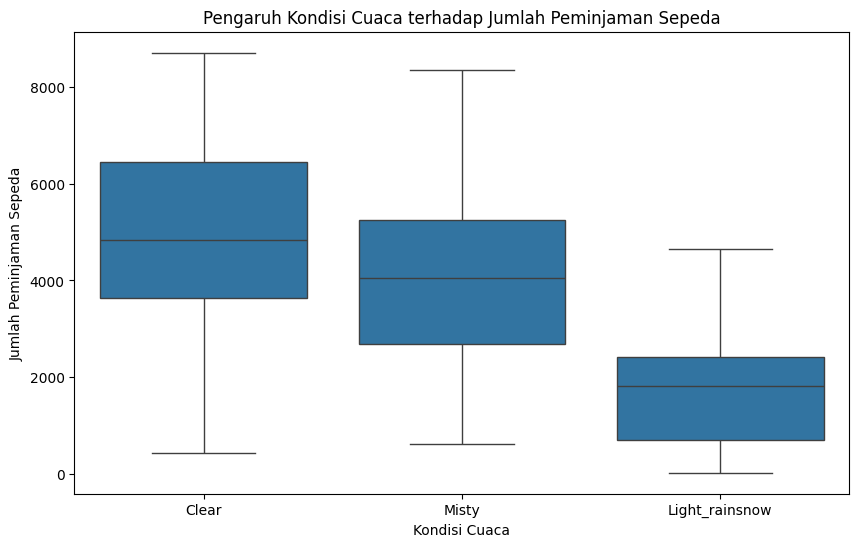

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather_situation', y='count_cr', data=day_df)
plt.title('Pengaruh Kondisi Cuaca terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.show()

**Insight**

1. **Cuaca Cerah (Clear)**:
   - Median jumlah peminjaman sepeda pada kondisi cuaca cerah adalah yang tertinggi dibandingkan dengan kondisi cuaca lainnya.
   - Variasi jumlah peminjaman cukup besar (IQR lebar), menunjukkan bahwa banyak faktor mempengaruhi peminjaman pada cuaca cerah.

2. **Cuaca Berkabut (Misty)**:
   - Jumlah peminjaman lebih rendah dibandingkan cuaca cerah, tetapi tetap signifikan.
   - Variasi jumlah peminjaman lebih kecil dibandingkan dengan cuaca cerah.

3. **Hujan Ringan/Salju Ringan (Light_rainsnow)**:
   - Jumlah peminjaman terendah pada kondisi ini.
   - Variasi jumlah peminjaman cukup kecil, menunjukkan konsistensi dalam jumlah peminjaman rendah pada kondisi cuaca buruk.



### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan waktu bulan??

<ipython-input-33-5029dd31b8a0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x=month_avg.index, y=month_avg.values, palette='viridis')


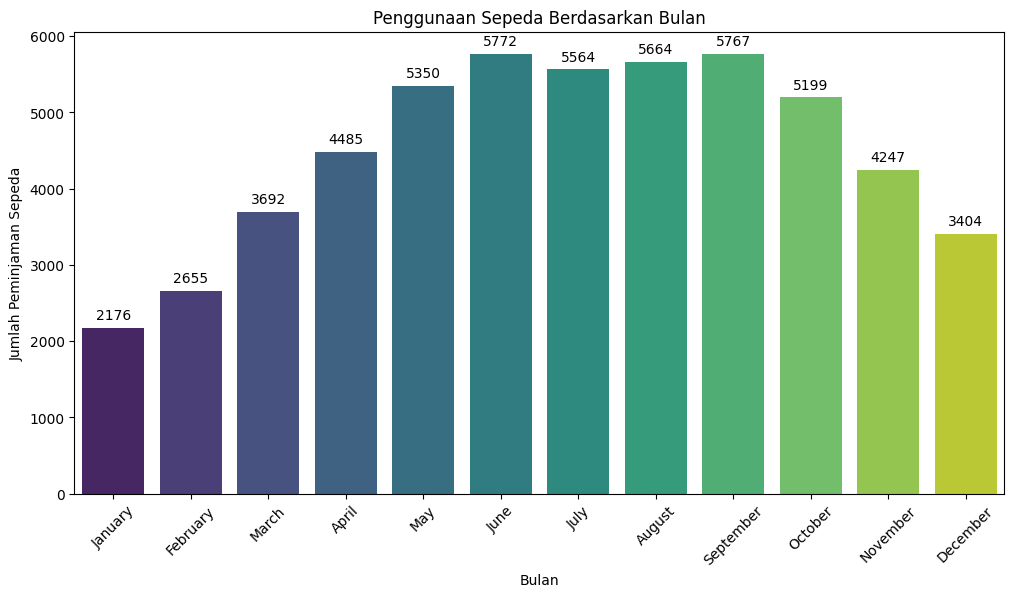

In [33]:
# Menambahkan kolom month ke dalam data frame
day_df['month'] = day_df['dteday'].dt.month_name()

# Menghitung rata-rata jumlah peminjaman sepeda per bulan
month_avg = day_df.groupby('month')['count_cr'].mean().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Membuat plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(x=month_avg.index, y=month_avg.values, palette='viridis')

# Menambahkan anotasi pada setiap bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha = 'center', va = 'center',
                      xytext = (0, 9),
                      textcoords = 'offset points')

# Menambahkan judul dan label sumbu
plt.title('Penggunaan Sepeda Berdasarkan Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.xticks(rotation=45)
plt.show()

**Insight**

1. **Bulan dengan Penggunaan Tertinggi**:
   - **Juni** dan **September** adalah bulan dengan jumlah peminjaman sepeda tertinggi.
   - **Agustus** dan **Juli** juga memiliki jumlah peminjaman yang tinggi.

2. **Bulan dengan Penggunaan Terendah**:
   - **Januari** dan **Februari** memiliki jumlah peminjaman sepeda terendah.
   - **Desember** juga menunjukkan penurunan signifikan.

3. **Tren Penggunaan Sepeda**:
   - Penggunaan sepeda mulai meningkat pada bulan **Maret** dan **April**, dan mencapai puncaknya selama bulan-bulan musim panas (Mei hingga September).
   - Setelah September, penggunaan sepeda mulai menurun dengan penurunan bertahap pada bulan **Oktober**, **November**, dan **Desember**.

### Pertanyaan 3: Jam Berapa Saja Penggunaan Sepeda Ramai dan Sepi?

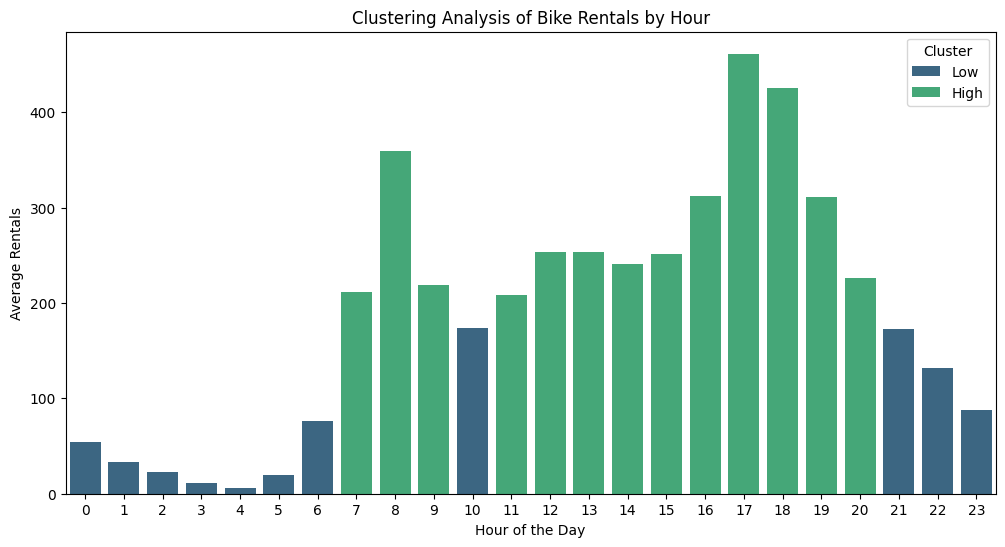

In [34]:
# Plot Clustering Analysis
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='avg_rentals', hue='cluster', data=hour_avg, palette='viridis')
plt.title('Clustering Analysis of Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.legend(title='Cluster')
plt.show()

**Insight:**
1. **Jam dengan Peminjaman Tinggi (High):**
   - Jam sibuk dengan peminjaman sepeda tertinggi adalah antara jam 7 pagi hingga 9 pagi (07:00 - 09:00) dan jam 4 sore hingga 8 malam (16:00 - 20:00).
   - Puncak tertinggi adalah pada jam 5 sore (17:00) dengan rata-rata peminjaman mencapai 461.45 sepeda.

2. **Jam dengan Peminjaman Rendah (Low):**
   - Jam-jam dengan peminjaman rendah terutama terjadi pada malam hari hingga dini hari (00:00 - 06:00) dan larut malam (22:00 - 23:00).
   - Peminjaman terendah terjadi pada jam 4 pagi (04:00) dengan rata-rata peminjaman hanya 6.35 sepeda.

### Pertanyaan 4: Bagaimana Retensi dan Loyalitas Pengguna?


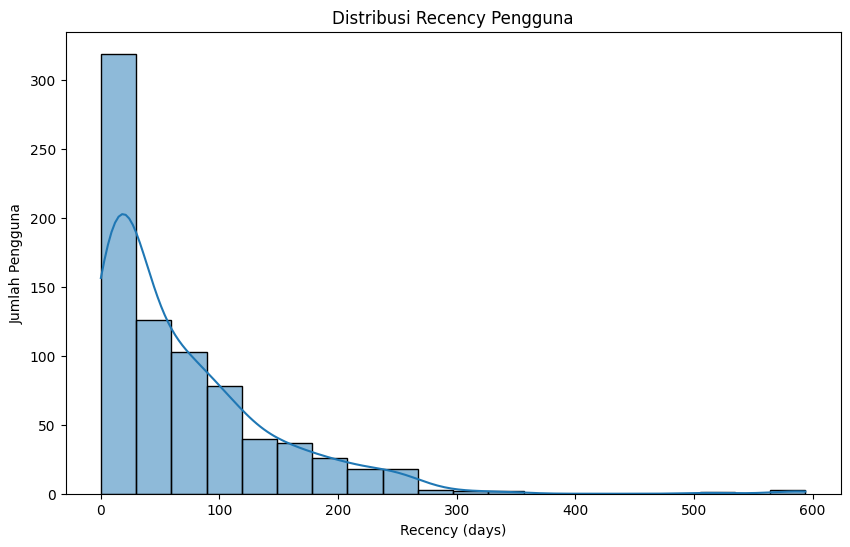

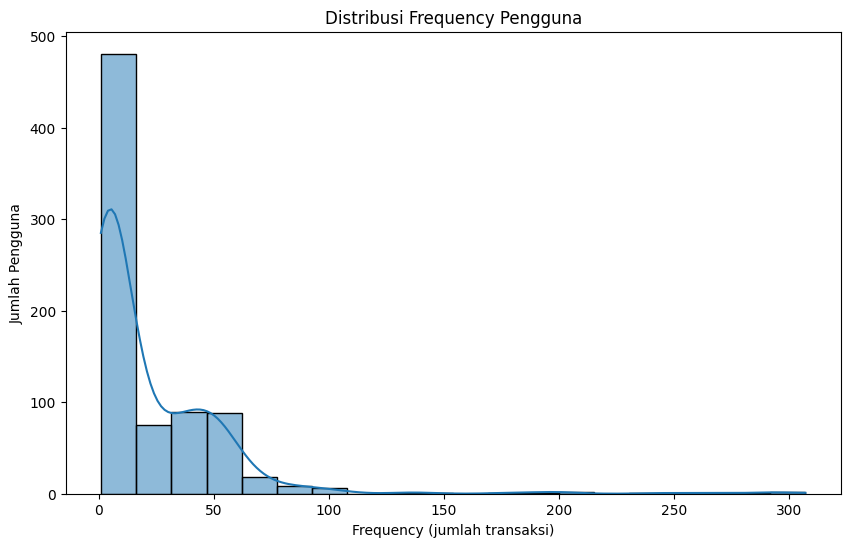

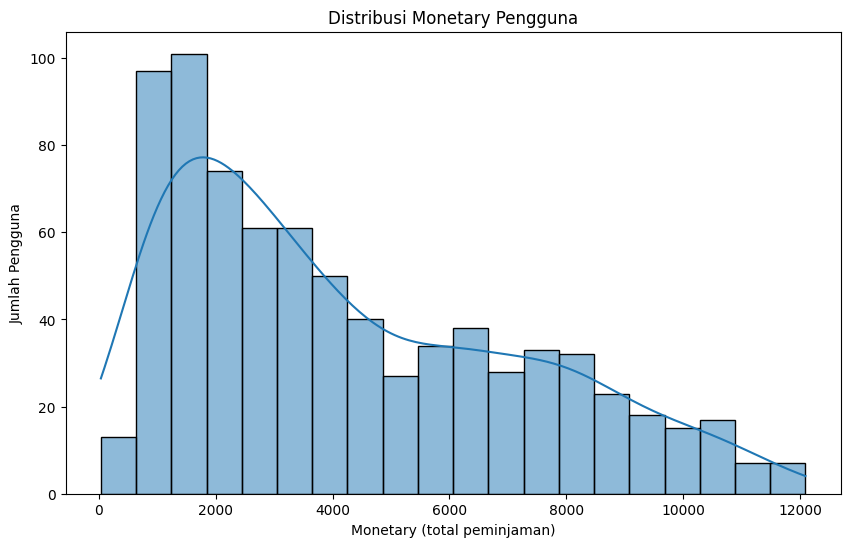

In [35]:
# Plot distribusi Recency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['Recency'], bins=20, kde=True)
plt.title('Distribusi Recency Pengguna')
plt.xlabel('Recency (days)')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Plot distribusi Frequency
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['Frequency'], bins=20, kde=True)
plt.title('Distribusi Frequency Pengguna')
plt.xlabel('Frequency (jumlah transaksi)')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Plot distribusi Monetary
plt.figure(figsize=(10, 6))
sns.histplot(rfm_df['Monetary'], bins=20, kde=True)
plt.title('Distribusi Monetary Pengguna')
plt.xlabel('Monetary (total peminjaman)')
plt.ylabel('Jumlah Pengguna')
plt.show()

#### 1. Distribusi Recency Pengguna
- **Insight**: Mayoritas pengguna melakukan transaksi terakhir mereka dalam waktu yang relatif dekat, dengan puncak pada nilai recency yang sangat rendah (0-100 hari). Ini menandakan bahwa banyak pengguna masih aktif dalam menggunakan layanan penyewaan sepeda baru-baru ini.
- **Rekomendasi**: Untuk mempertahankan pengguna yang aktif baru-baru ini, operator bisa menawarkan promosi atau insentif khusus untuk menjaga mereka tetap menggunakan layanan ini secara berkelanjutan.

#### 2. Distribusi Frequency Pengguna
- **Insight**: Sebagian besar pengguna memiliki jumlah transaksi yang rendah. Mayoritas pengguna memiliki kurang dari 50 transaksi.
- **Rekomendasi**: Operator dapat mendorong peningkatan frekuensi penggunaan melalui program loyalitas atau penawaran diskon untuk penggunaan berulang, sehingga meningkatkan retensi pengguna.

#### 3. Distribusi Monetary Pengguna
- **Insight**: Nilai monetary (total peminjaman) pengguna cenderung menurun seiring dengan meningkatnya jumlah total peminjaman. Sebagian besar pengguna menghabiskan kurang dari 2000 dalam total peminjaman sepeda.
- **Rekomendasi**: Operator dapat mempertimbangkan strategi untuk meningkatkan nilai peminjaman, misalnya dengan menawarkan paket peminjaman jangka panjang atau berlangganan bulanan yang menguntungkan.


## Conclusion

### Pertanyaan 1: Bagaimana pengaruh kondisi cuaca terhadap jumlah peminjaman sepeda?


1. **Cuaca Cerah (Clear)**:
   - **Insight**: Median jumlah peminjaman sepeda tertinggi, dengan variasi peminjaman yang besar.
   - **Kesimpulan**: Cuaca cerah sangat kondusif untuk peminjaman sepeda. Operator dapat memanfaatkan kondisi ini dengan promosi khusus.

2. **Cuaca Berkabut (Misty)**:
   - **Insight**: Jumlah peminjaman lebih rendah dari cuaca cerah tetapi tetap signifikan, dengan variasi yang lebih kecil.
   - **Kesimpulan**: Peminjaman tetap cukup tinggi pada hari berkabut. Insentif tambahan dapat mempertahankan jumlah peminjaman.

3. **Hujan Ringan/Salju Ringan (Light_rainsnow)**:
   - **Insight**: Jumlah peminjaman terendah dengan variasi yang kecil.
   - **Kesimpulan**: Cuaca buruk menurunkan peminjaman sepeda. Operator dapat menawarkan diskon atau promosi untuk menarik lebih banyak pengguna pada hari-hari dengan cuaca buruk.

### Pertanyaan 2: Bagaimana tren penggunaan sepeda berdasarkan waktu bulan??

1. **Bulan dengan Penggunaan Tertinggi**:
   - **Juni dan September**: Jumlah peminjaman sepeda tertinggi.
   - **Agustus dan Juli**: Jumlah peminjaman juga tinggi.

2. **Bulan dengan Penggunaan Terendah**:
   - **Januari dan Februari**: Jumlah peminjaman sepeda terendah.
   - **Desember**: Penurunan signifikan dalam jumlah peminjaman.

3. **Tren Penggunaan Sepeda**:
   - **Peningkatan**: Penggunaan sepeda mulai meningkat pada bulan Maret dan April, mencapai puncak selama bulan-bulan musim panas (Mei hingga September).
   - **Penurunan**: Setelah September, penggunaan sepeda mulai menurun secara bertahap pada bulan Oktober, November, dan Desember.

###Pertanyaan 3: Jam Berapa Saja Penggunaan Sepeda Ramai dan Sepi?

1. **Jam dengan Peminjaman Tinggi (High)**:
   - **Jam Sibuk**: Peminjaman sepeda tertinggi terjadi antara jam 7 pagi hingga 9 pagi (07:00 - 09:00) dan jam 4 sore hingga 8 malam (16:00 - 20:00).
   - **Puncak Tertinggi**: Pada jam 5 sore (17:00) dengan rata-rata peminjaman mencapai 461.45 sepeda.

2. **Jam dengan Peminjaman Rendah (Low)**:
   - **Jam Sepi**: Peminjaman rendah terutama terjadi pada malam hari hingga dini hari (00:00 - 06:00) dan larut malam (22:00 - 23:00).
   - **Terendah**: Pada jam 4 pagi (04:00) dengan rata-rata peminjaman hanya 6.35 sepeda.

###Pertanyaan 4: Bagaimana Retensi dan Loyalitas Pengguna?

- **Retensi**: Retensi pengguna layanan penyewaan sepeda cukup baik, ditandai dengan tingginya jumlah pengguna yang baru-baru ini melakukan transaksi. Hal ini menunjukkan bahwa banyak pengguna yang masih aktif dan menggunakan layanan secara berkala.
- **Loyalitas**: Loyalitas pengguna perlu ditingkatkan, karena sebagian besar pengguna hanya melakukan sedikit transaksi dan memiliki nilai peminjaman yang relatif rendah. Untuk meningkatkan loyalitas, operator perlu mendorong pengguna untuk lebih sering menggunakan layanan dan meningkatkan nilai peminjaman mereka.